# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science 

## Lecture 1, Exercise 1: The Data Science Process


**Harvard University**<br/>

---

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patheffects as pe
from helper import get_distance
from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression
# ensures that plt.plots are displayed directly w/in the notebook cells.
%matplotlib inline 

In [58]:
# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [59]:
# Read the data from the file "hubway_stations.csv"
stations = pd.read_csv("hubway_stations.csv")

# Read the data from the file "hubway_trips.csv"
trips = pd.read_csv("hubway_trips.csv")

In [60]:
# Take a quick look at the stations data
stations.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [61]:
# Take a quick look at the trips data
trips.head()

,Unnamed: 0,hubway_id,duration,start_date,strt_statn,end_date,end_statn,zip_code,birth_date,gender
0,426015,482077,675,8/18/2012 19:48:00,8.0,8/18/2012 20:00:00,8.0,'02134,1983.0,Male
1,193080,220612,204,4/26/2012 18:14:00,31.0,4/26/2012 18:17:00,64.0,'02210,1953.0,Male
2,530051,598721,888,9/23/2012 09:26:00,39.0,9/23/2012 09:41:00,39.0,'02118,1985.0,Male
3,484594,547645,526,9/8/2012 12:55:00,88.0,9/8/2012 13:04:00,72.0,'02139,1985.0,Male
4,291265,332163,554,6/21/2012 18:53:00,47.0,6/21/2012 19:02:00,54.0,'02113,1986.0,Female


### **UNDERSTANDING THE DATA**

It is important to completely understand all the information provided in the data. The first step for this is to take a closer look at all the columns and understand their types.

In [62]:
# Getting the data type of each column in the stations data
stations.dtypes

id             int64
terminal      object
station       object
municipal     object
lat          float64
lng          float64
status        object
dtype: object

In [63]:
# Getting the data type of each column in the trips data
trips.dtypes

Unnamed: 0      int64
hubway_id       int64
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
zip_code       object
birth_date    float64
gender         object
dtype: object

In [64]:
# Getting some statistical information from the stations data
stations.describe()

,id,lat,lng
count,142.000000,142.000000,142.000000
mean,74.323944,42.354820,-71.089087
std,41.389098,0.020089,0.027111
min,3.000000,42.309467,-71.146452
25%,39.250000,42.341652,-71.113183
50%,74.500000,42.353373,-71.089191
75%,109.750000,42.366265,-71.065210
max,145.000000,42.404490,-71.035705


In [65]:
# Getting some statistical information from the trips data
trips.describe()

,Unnamed: 0,hubway_id,duration,strt_statn,end_statn,birth_date
count,210239.000000,210239.000000,2.102390e+05,210239.000000,210239.000000,210239.000000
mean,283491.142771,321401.542806,7.794459e+02,36.727567,36.662261,1976.285594
std,153204.497985,173059.875974,1.349006e+04,18.592716,18.551934,11.002281
min,0.000000,8.000000,0.000000e+00,3.000000,3.000000,1932.000000
25%,153899.000000,174103.000000,3.460000e+02,22.000000,22.000000,1969.000000
50%,280081.000000,319856.000000,5.320000e+02,38.000000,38.000000,1979.000000
75%,414740.000000,469290.000000,8.280000e+02,50.000000,50.000000,1985.000000
max,549285.000000,620312.000000,5.351083e+06,98.000000,98.000000,1995.000000


### ⏸ Based on your understanding of the data, what questions would you like to have answered?

In [66]:
### edTest(test_chow1) ###
# Submit the questions as a string below. Separate each question by an eroteme (question mark) 
answer1 = 'Do male-identifying or female-identifying individuals use the bikes more often? Do younger or older people use the bikes more often? What station had the most trips? In what zip code was this most popular station? Which area had the longest trips? Which area had the shortest trips? How can we use the answers to these questions to help boost profits of Hubway?'

### **DATA PRE-PROCESSING**

Let us clean the data before breaking it down further. There are many pre-processing techqniues which will be covered later in the course.


In [67]:
# Delete all the rows of the stations dataframe with null values 
# axis=0 indicates that the rows with null values are to be deleted
stations.dropna(axis=0, inplace=True)

In [68]:
# Delete all the rows of the trips dataframe with null values 
trips.dropna(axis=0, inplace=True)

In [69]:
# Create a new column that gives the age of each rider
age_col = 2024.0 - trips['birth_date'].values

# Add the age column to the trips dataframe
trips['age'] = age_col

# Drop the 'birth_date' column
trips.drop('birth_date', axis=1, inplace=True)

In [70]:
# Create a new dataframe that combines info from `stations` and `trips`
checkout_dist_df = get_distance(stations, trips)

In [71]:
# Peek to see the results
checkout_dist_df.head()

,id,checkouts,terminal,station,municipal,lat,lng,status,dist_to_center
0,3.0,1878,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing,2.335706
1,4.0,3376,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing,0.853095
2,5.0,1913,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing,1.802423
3,6.0,3616,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing,0.467803
4,7.0,1384,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing,0.807582


### **EXPLORATORY DATA ANALYSIS (EDA)**

As you would have noticed, the information extracted above is not sufficient to answer most of the questions and is definitely not sufficient to ask relevant questions. Hence, we will need to perform additional data analysis. 



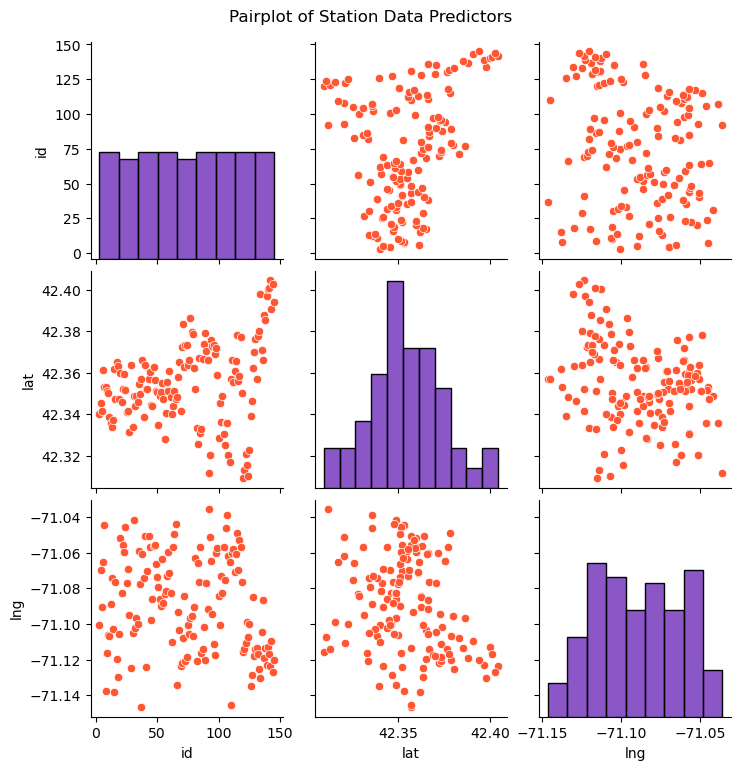

In [72]:
# Find out if there is any relation between the predictors of the stations data
sns.pairplot(stations, diag_kind='hist', plot_kws={'color': '#FF5733'}, diag_kws={'color': '#651fb4'})

# Add a title using matplotlib
plt.suptitle('Pairplot of Station Data Predictors', y=1.02)  # y=1.02 adjusts the title position

plt.show()


### ⏸ Based on the plot above, do you notice any recognizable relationship between any of the columns?

#### A. The latitude and longitude are directly proportional to each other.
#### B. The latitude and longitude are inversely proportional to each other.
#### C. It is random. There seems to be no relation between the latitude and longitude.



In [82]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'C'


Text(0.5, 1.0, 'Users by Gender')

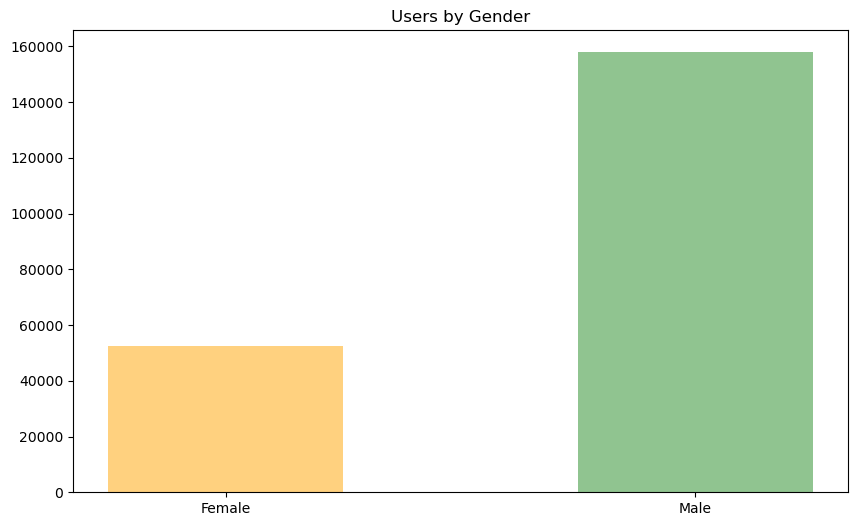

In [75]:
# Get the unique number of male and female bike riders
gender_counts = np.unique(trips['gender'].values, return_counts=True)

# Plotting the genders of riders as a histogram
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(range(2), width=0.5, height = gender_counts[1],color=['orange', 'forestgreen'], alpha=0.5 )
ax.set_xticks([0, 1])
ax.set_xticklabels(gender_counts[0])
ax.set_title('Users by Gender');


### ⏸ Based on the plot above, who uses the bikes more, men or women?
#### A. Women
#### B. Men
#### C. Can't say

In [76]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'B'


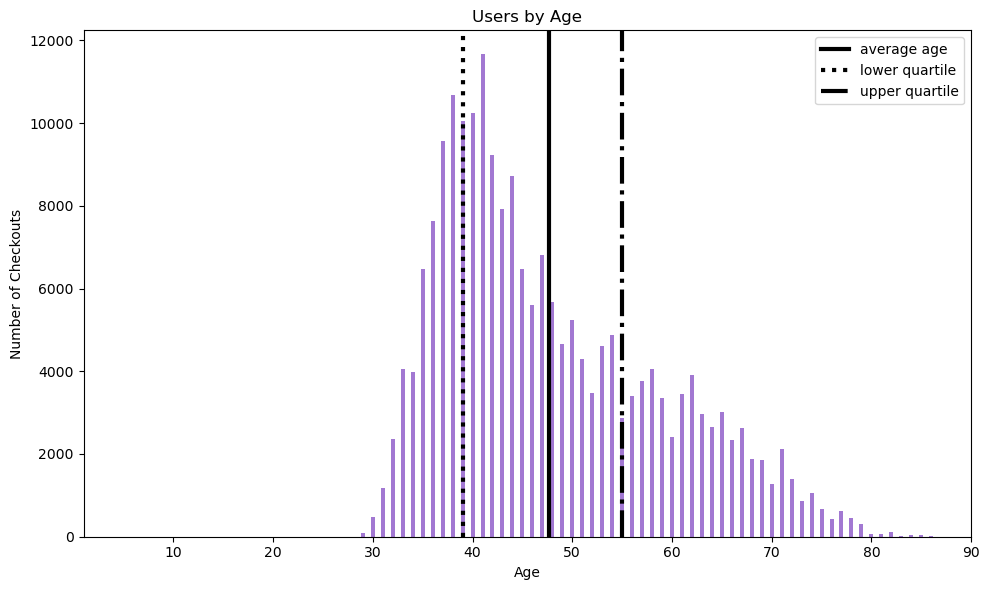

In [77]:
# Plotting the usage of bikes based on the ages of riders
fig, ax = plt.subplots(1,1, figsize=(10, 6))
age_counts = np.unique(trips['age'], return_counts=True)
ax.bar(age_counts[0], age_counts[1], align='center', width=0.4, alpha=0.6, color='#651fb4')
# Plot the vertical lines with different styles and thicker lines
ax.axvline(x=np.mean(age_col), color='k', label='average age', linewidth=3)
ax.axvline(x=np.percentile(age_col, 25), color='k', linestyle=':', label='lower quartile', linewidth=3)
ax.axvline(x=np.percentile(age_col, 75), color='k', linestyle='-.', label='upper quartile', linewidth=3)

ax.set_xlim([1, 90])
ax.set_xlabel('Age')
ax.set_ylabel('Number of Checkouts')
ax.legend()
ax.set_title('Users by Age')
plt.tight_layout()


### ⏸ Based on the sample of ages provided and the plot above, which age demographic are the bikes more popular with?
#### A. Older
#### B. Younger

In [78]:
### edTest(test_chow4) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer4 = 'B'


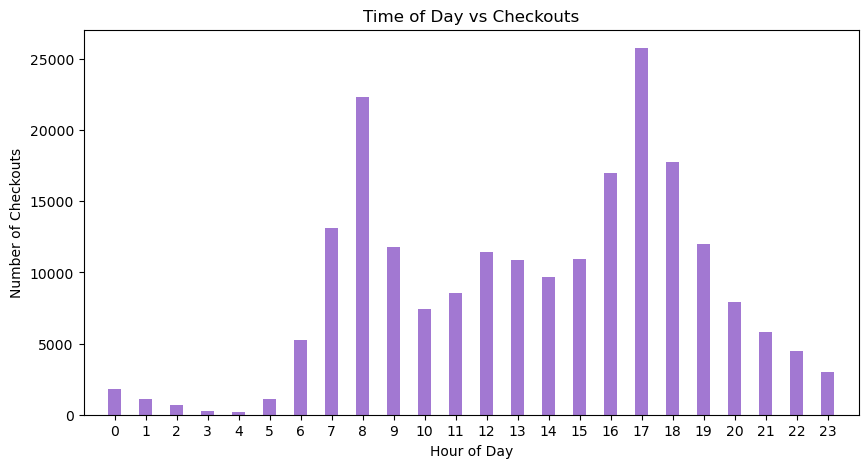

In [79]:
# Get the hourwise bike checkouts
check_out_hours = trips['start_date'].apply(lambda s: int(s[-8:-6]))

# Plotting the bike checkouts hourwise
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6, color='#651fb4')
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')
plt.show()


### ⏸ Based on the plot above, when is the biggest rush hour?

In [80]:
### edTest(test_chow5) ###
# Submit the 24-hour clock integer value below within the quotes
answer5 = '17'


## **Optional and on your own:**

Based off of the `checkout_dist_df` dataframe you made above, create a simple linear model to predict the number of checkouts based on the distance of the bike station from the centre of the city.

Visualize the prediction against the data.

Your linear prediction should state that there are *negative checkouts* for distances greater than 4 miles. 

In [81]:
# Not graded. Code up a linear Model based on checkout_dist dataframe we created earlier.